In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape') #accessing data using pandas and storing in a variable df

In [4]:
#checking the file information
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#deleting or removing blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df['Amount'].describe()

count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

In [9]:
#filling null values using sklearn
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df.Amount=imputer.fit_transform(df['Amount'].values.reshape(-1,1))

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
#change the datatype of amount from float to int
df['Amount']=df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
#describe() method gives the description of the data in dataframe(i.e., mean count, min, max, std deviation,etc.
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176429
std,1.716125e+03,12.754122,0.493632,1.115047,5219.753707
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#EDA(Exploratory Data Analysis)

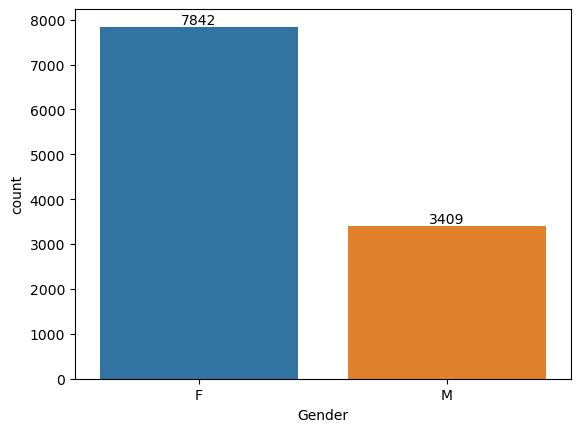

In [15]:
#plotting bar chart for it's count
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

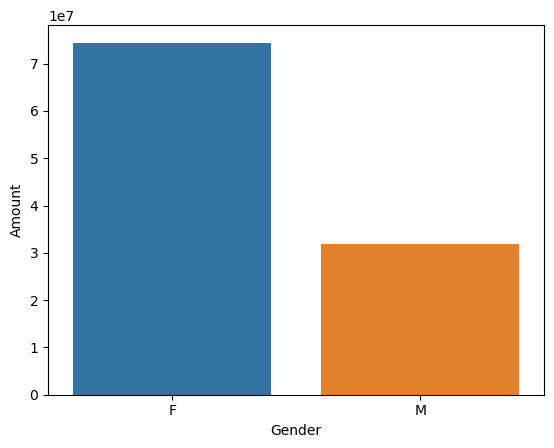

In [16]:
#plotting bar chart gender vs total amount
Sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax=sns.barplot(x='Gender',y='Amount',data=Sales_gen)

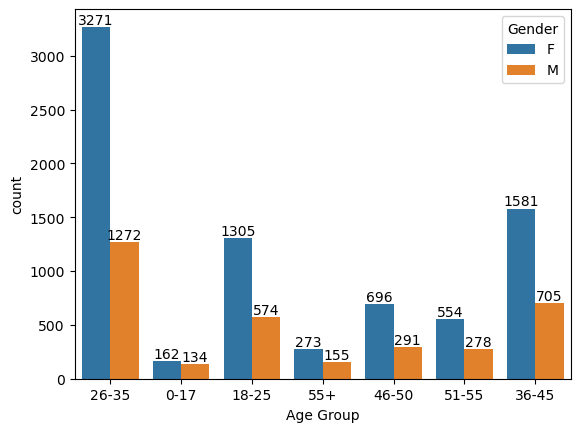

In [17]:
#plotting bar chart Age vs it's count
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

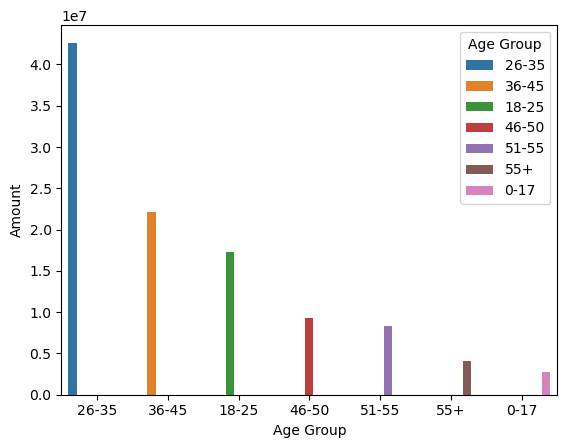

In [19]:
#plotting bar chart Total Amount vs Age Group
Sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=Sales_age,hue='Age Group')

<Axes: xlabel='State', ylabel='Orders'>

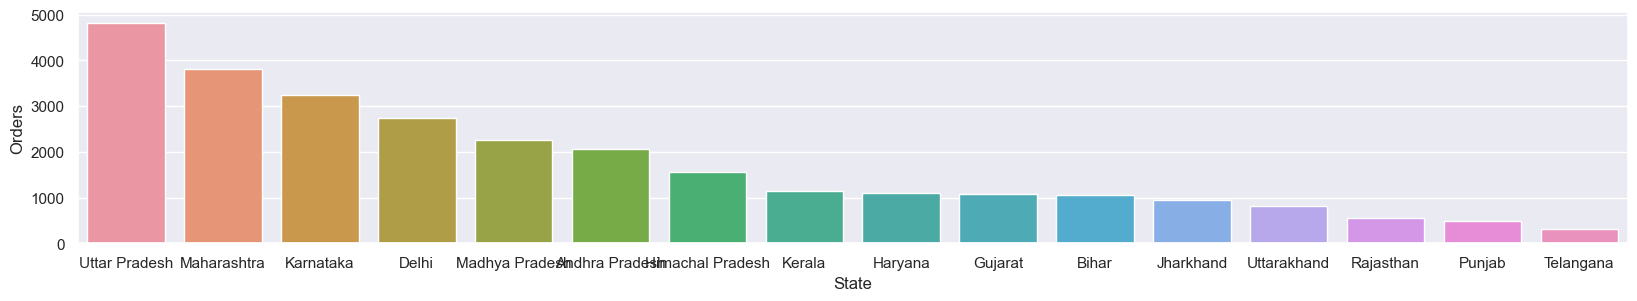

In [23]:
#total no of orders from top 10 states
Sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(x='State', y ='Orders',data=Sales_state)

<Axes: xlabel='State', ylabel='Amount'>

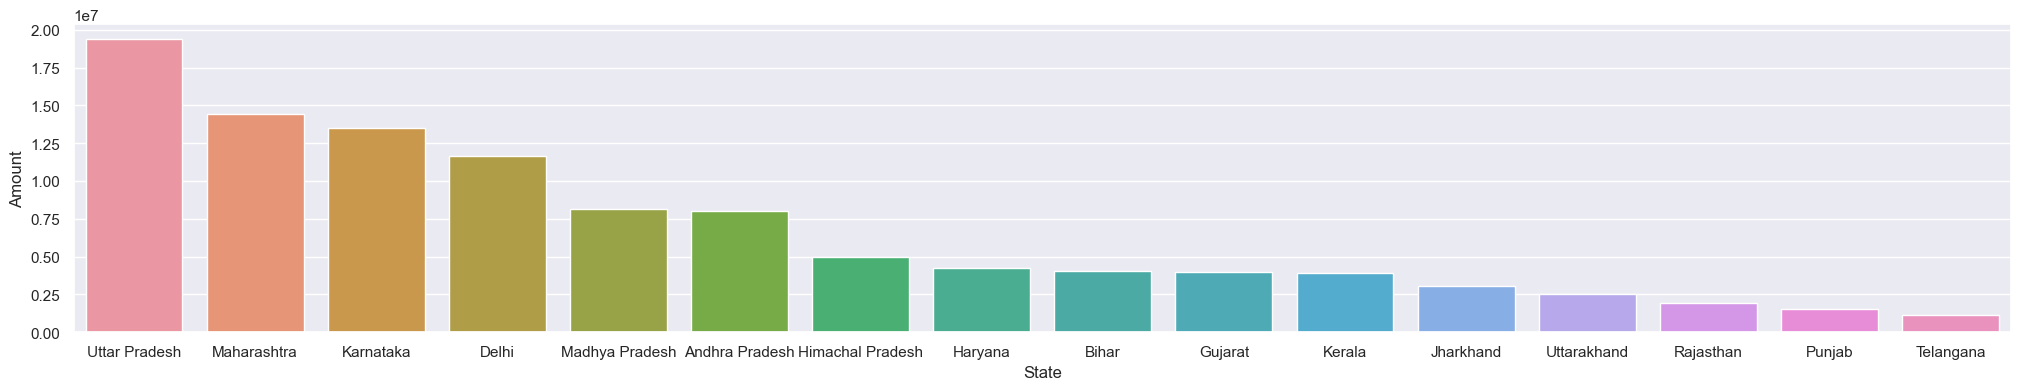

In [24]:
#total sales/amount from top 10 states
Sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,4)})
sns.barplot(x='State', y ='Amount',data=Sales_state)

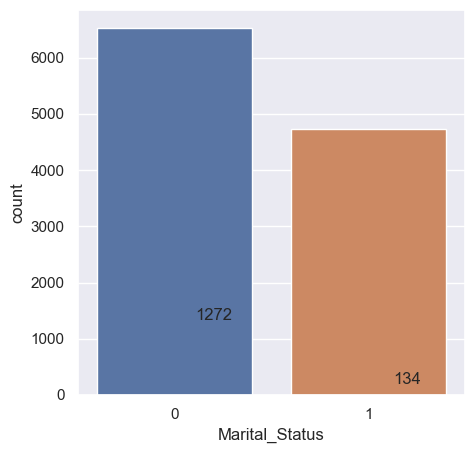

In [26]:
#plotting bar chart of marital status and it's count
ax=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(5,5)})
for bar in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

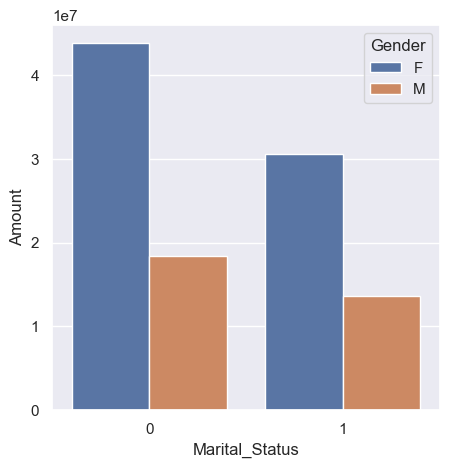

In [27]:
#marital status vs amount
Sales_ms=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=Sales_ms,x='Marital_Status',y='Amount',hue='Gender')

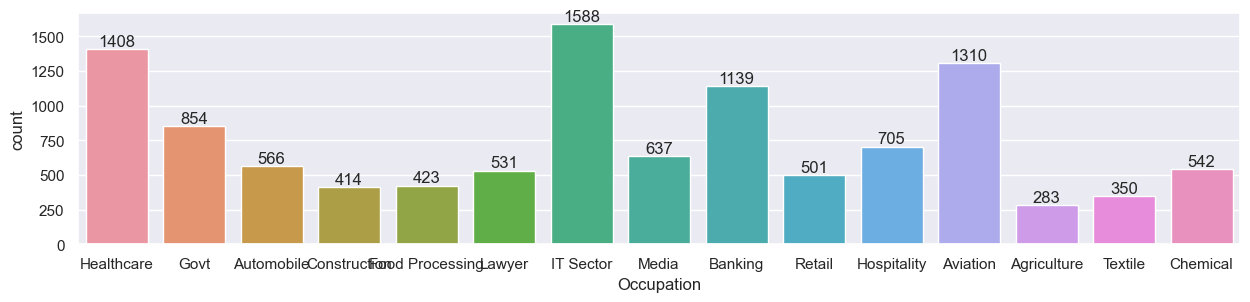

In [28]:
#plotting bar chart for Occupation and it's count
sns.set(rc={'figure.figsize':(15,3)})
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

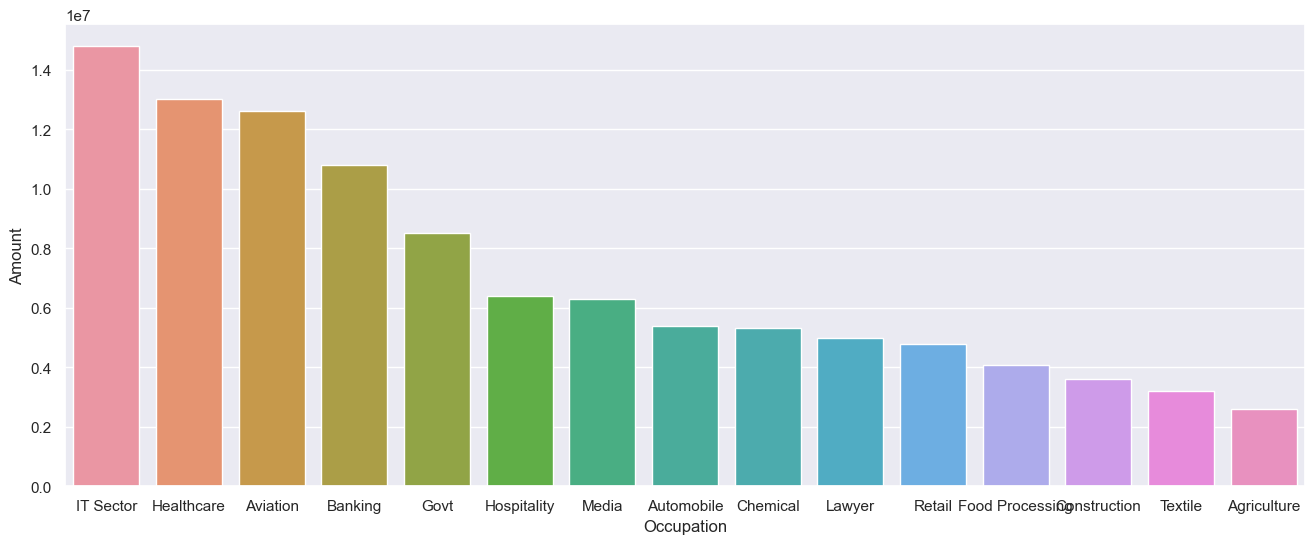

In [30]:
#Occupation vs Amount
Sales_occ=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data=Sales_occ,x='Occupation',y='Amount')

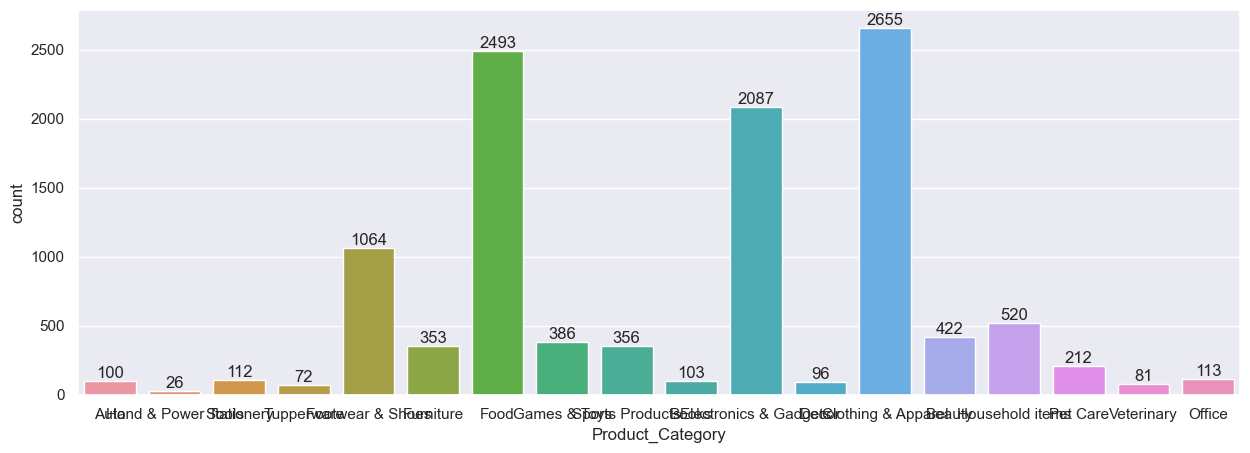

In [32]:
#plotting bar chart for product category and it's count
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

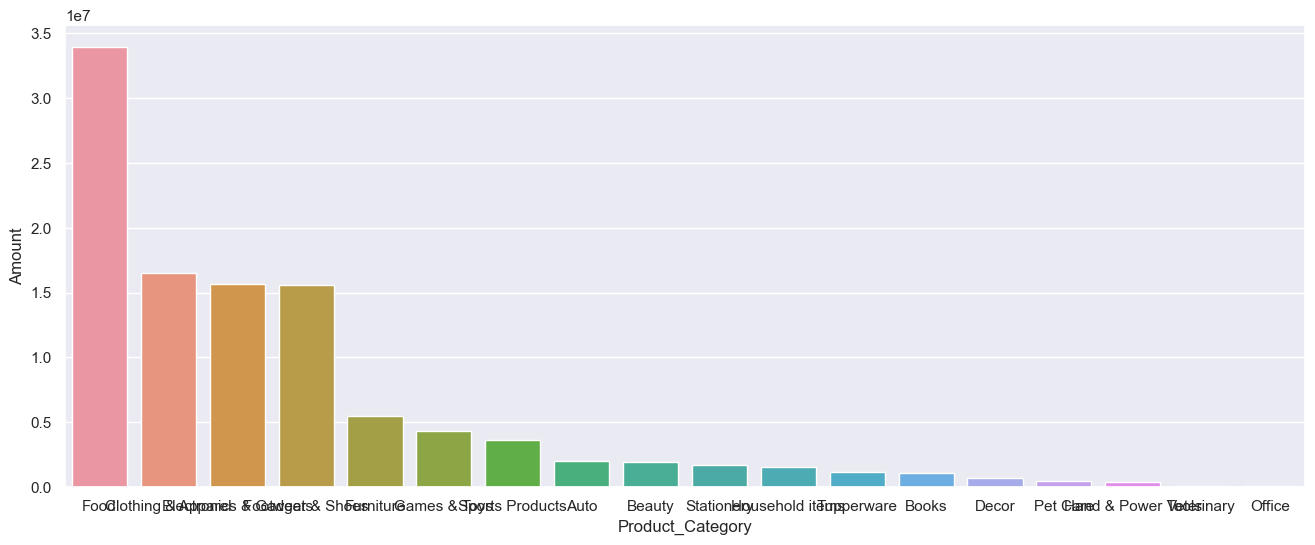

In [33]:
#product_category vs Amount
Sales_pc=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data=Sales_pc,x='Product_Category',y='Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

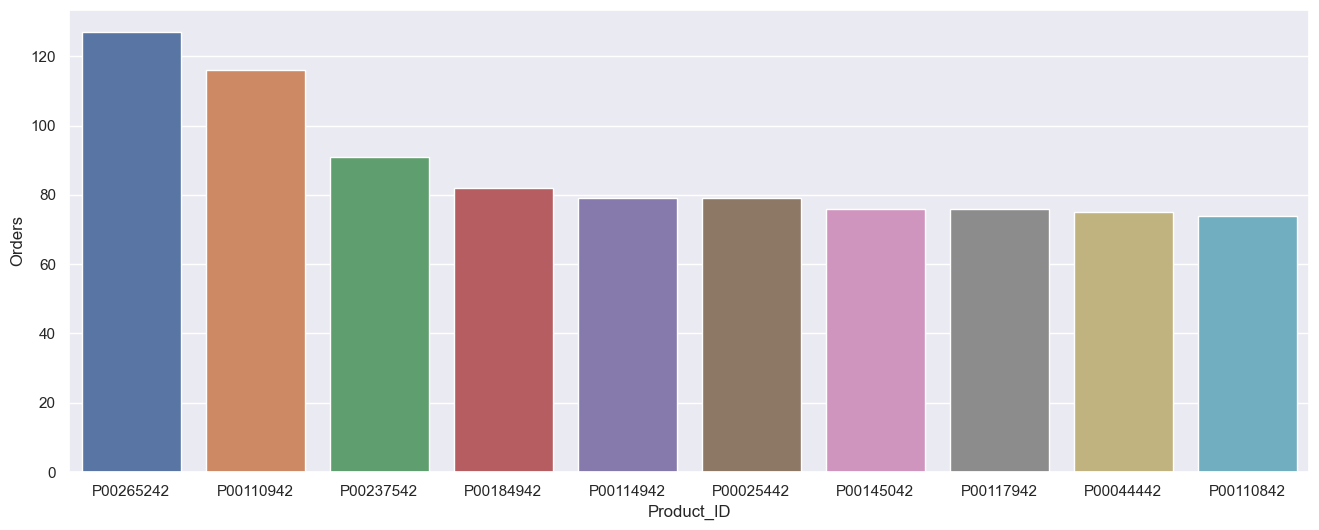

In [35]:
#top 10 sold products
Sales_tp=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data=Sales_tp,x='Product_ID',y='Orders')

In [36]:
#save the file
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [39]:
df=pd.DataFrame(df,columns=['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount']).to_csv('Diwali_Analysis.csv')